# Praca domowa 2
### Sebastian Deręgowski

Na potrzeby tej pracy domowej przeanalizowałem swoje dwie bazy danych według podanych wytycznych. Poniżej prezentują się wyniki analiz.

## COVID-19-CT-Seg

### Informacje podstawowe

* **Rodzaj bazy danych:** obrazowa
* **Zadania:** segmentacja płuc, segmentacja zainfekowanego obszaru płuc
* **Licencja:** C BY-NC-SA
* **Rodzaj annotacji:** maski
* **Choroby czy zmiany chorobowe:** maski przedstawiają zainfekowany obszar płuc
* **Rodzaj zdjęć:** 3D

### Dane ilościowe

* **Liczba zdjęć:** 20
* **Liczba unikatowych pacjentów:** brak informacji, zakładam, że 20
* **CT/RTG:** CT
* **Kompletność masek:** wszystkie zdjęcia mają po 3 maski
* **Zdjęcia zdrowego pacjenta:** brak porównania
* **Dodatkowe informacje:**
    * dwie klasy zdjęć *coronacases* i *radiopaedia*, obie po 10 zdjęć
    * dla zdjęć *coronacases* rzuty z boku i z przodu zawierają 512 zdjęć, a liczba zdjęć dla rzutu z góry waha się pomiędzy 200 a 301 (patrz: kod poniżej)
    * dla zdjęć *radiopaedia* rzuty z boku i przodu zawierają po 630 zdjęć, a liczba zdjęć z góry jest bardzo zróżnicowana, większość ma kilkadziesiąt (30-60) zdjęć, ale są też przypadki 100 i 400 zdjęć (patrz: kod poniżej)

### Informacje o danych

* **Rozszerzenie zdjęć:** NIFTI
* **Sprzęt, na którym wykonano badania:** brak informacji
* **Format annotacji:** NIFTI
* **Płaszczyzny zdjęć:** trzy rzuty: z góry, z przodu i z boku
* **Nazwy klas:** nie dotyczy, zadanie segmentacji
* **Kontrast:** brak
* **Data wykonania zdjęć:** brak informacji, jednak ze względu na to, że jest to baza covidowa, zdjęcia musiały powstać w 2020+ roku
* **Slice thickness:** zależny od liczby zdjęć w danym rzucie, która różni się pomiędzy zdjęciami (patrz: kod poniżej)
* **Kształt zdjęć:** w przypadku zdjęć *coronacases* wszystkie rzuty są kwadratowe, dla zdjęć *radiopaedia* tylko rzut z góry jest kwadratowy
* **Podział na zbiór testowy i treningowy:** brak
* **Kraj pochodzenia zdjęć:** brak informacji

### Balans danych

* **Balans klas w zbiorze testowym i treningowym:** brak zbioru treningowego i testowego
* **Rozkład wieku pacjentów:** brak informacji
* **Rozkład płci pacjentów:** brak informacji
* **Rozkład zdrowotności pacjentów:** wszyscy pacjenci w zbiorze są chorzy na COVID

### Analiza metadanych

* **Metadane**: większość danych w headerze to 0, *none* lub *nan* (patrz: kod poniżej)
* **Wiek:** brak informacji
* **Pomieszanie dzieci i dorosłych:** brak informacji
* **Braki w metadanych:** brak
* **Mierzenie poważności zmian:** brak
* **Pacjenci covidowi:** tak
* **Dane usunięte**: wszystkie

In [63]:
from os import listdir
from os.path import isfile, join
path = '/Users/deregowskis/Desktop/studies/WB/COVID-19-CT-Seg_20cases'
covid_files = [f for f in listdir(path) if isfile(join(path, f)) and f[-3:]=="nii"]

In [64]:
import nibabel as nib

x_ax = []
y_ax = []
z_ax = []

for f in covid_files:
    img = nib.load(path+'/'+f)
    x_ax.append(img.shape[0])
    y_ax.append(img.shape[1])
    z_ax.append(img.shape[2])
print('Liczba zdjęć w danej płaszczyźnie:')   
print(f'rzut x: {x_ax}')
print(f'rzut y: {y_ax}')
print(f'rzut z: {z_ax}')

Liczba zdjęć w danej płaszczyźnie:
rzut x: [512, 512, 512, 512, 512, 630, 512, 512, 512, 630, 630, 630, 630, 630, 630, 630, 512, 512, 630, 630]
rzut y: [512, 512, 512, 512, 512, 630, 512, 512, 512, 401, 630, 630, 630, 630, 630, 630, 512, 512, 630, 630]
rzut z: [301, 200, 200, 249, 213, 42, 270, 301, 290, 110, 418, 39, 42, 45, 39, 66, 301, 256, 93, 45]


Scatterplot matrix 3D mało "widowiskowy" ze względu na brak rozrzutu danych:

[[<AxesSubplot:xlabel='x', ylabel='x'>
  <AxesSubplot:xlabel='y', ylabel='x'>
  <AxesSubplot:xlabel='z', ylabel='x'>]
 [<AxesSubplot:xlabel='x', ylabel='y'>
  <AxesSubplot:xlabel='y', ylabel='y'>
  <AxesSubplot:xlabel='z', ylabel='y'>]
 [<AxesSubplot:xlabel='x', ylabel='z'>
  <AxesSubplot:xlabel='y', ylabel='z'>
  <AxesSubplot:xlabel='z', ylabel='z'>]]


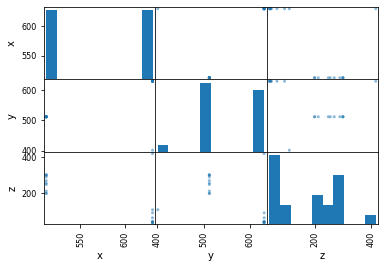

In [83]:
import pandas as pd
covid_dataframe = pd.DataFrame({'x':x_ax,'y':y_ax,'z':z_ax})
plot = pd.plotting.scatter_matrix(covid_dataframe)
print(plot)

In [67]:
print('Przykładowy header:')
print(nib.load(path+'/'+covid_files[5]).header)

Przykładowy header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 630 630  42   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.        0.683594  0.683594  6.        1.        1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 159.0
qoffset_y       : 174.0
qoffs

## Pediatric Chest X-Ray Pneumonia

### Informacje podstawowe

* **Rodzaj bazy danych:** obrazowa
* **Zadania:** klasyfikacja zapalenia płuc
* **Licencja:** Attribution 4.0 International (CC BY 4.0)
* **Rodzaj annotacji:** zdjęcia podzielone są na foldery *NORMAL* i *PNEUMONIA*
* **Choroby czy zmiany chorobowe:** maski przedstawiają zainfekowane płuca
* **Rodzaj zdjęć:** 2D

### Dane ilościowe

* **Liczba zdjęć:** 5856
* **Liczba unikatowych pacjentów:** brak informacji, zakładam, że 5860
* **CT/RTG:** RTG
* **Projekcje:** wszystkie zdjęcia w tej samej projekcji
* **Zdjęcia zdrowego pacjenta:** brak porównania

### Informacje o danych

* **Rozszerzenie zdjęć:** JPEG
* **Sprzęt, na którym wykonano badania:** brak informacji
* **Format annotacji:** przydzielenie plików do odpowiednich folderów
* **Płaszczyzny zdjęć:** rzut z przodu
* **Nazwy klas:** foldery nazwane *NORMAL* i *PNEUMONIA*
* **Kontrast:** brak
* **Data wykonania zdjęć:** brak informacji
* **Slice thickness:** nie dotyczy
* **Kształt zdjęć:** różny (patrz: kod poniżej)
* **Podział na zbiór testowy i treningowy:** tak
* **Kraj pochodzenia zdjęć:** brak informacji

### Balans danych

* **Balans klas w zbiorze testowym i treningowym:**
    * zbiór treningowy: 5232 zdjęć (89,3%), w tym:
        * 3883 zdjęcia zainfekowanych płuc (74,2%)
        * 1349 zdjęć zdrowych płuc (25,8%)
    * zbiór testowy: 624 zdjęć (10,7%), w tym:
        * 390 zdjęć zainfekowanych płuc (62,5%)
        * 235 zdjęć zdrowych płuc (37,5%)
* **Rozkład wieku pacjentów:** brak informacji
* **Rozkład płci pacjentów:** brak informacji
* **Rozkład zdrowotności pacjentów:** opisany wyżej

### Analiza metadanych

* **Metadane**: brak
* **Wiek:** brak informacji
* **Pomieszanie dzieci i dorosłych:** baza danych składa się wyłącznie ze zdjęć dzieci
* **Braki w metadanych:** brak
* **Mierzenie poważności zmian:** brak
* **Pacjenci covidowi:** nie wiadomo
* **Dane usunięte**: wszystkie

In [76]:
from os import listdir
from os.path import isfile, join
path = '/Users/deregowskis/Desktop/studies/WB/Pediatric Chest X-Ray Pneumonia'
all_files = []
train_pneumonia = [f for f in listdir(path+'/'+'train/PNEUMONIA') if isfile(join(path+'/'+'train/PNEUMONIA', f))]
for file in train_pneumonia:
    all_files.append(path+'/'+'train/PNEUMONIA/'+file)
train_normal = [f for f in listdir(path+'/'+'train/NORMAL') if isfile(join(path+'/'+'train/NORMAL', f))]
for file in train_normal:
    all_files.append(path+'/'+'train/NORMAL/'+file)
test_pneumonia = [f for f in listdir(path+'/'+'test/PNEUMONIA') if isfile(join(path+'/'+'test/PNEUMONIA', f))]
for file in test_pneumonia:
    all_files.append(path+'/'+'test/PNEUMONIA/'+file)
test_normal = [f for f in listdir(path+'/'+'test/NORMAL') if isfile(join(path+'/'+'test/NORMAL', f))]
for file in test_normal:
    all_files.append(path+'/'+'test/NORMAL/'+file)

In [82]:
from PIL import Image

width = []
height = []

for file in all_files:
    width.append(Image.open(file).size[0])
    height.append(Image.open(file).size[1])

[[<AxesSubplot:xlabel='width', ylabel='width'>
  <AxesSubplot:xlabel='height', ylabel='width'>]
 [<AxesSubplot:xlabel='width', ylabel='height'>
  <AxesSubplot:xlabel='height', ylabel='height'>]]


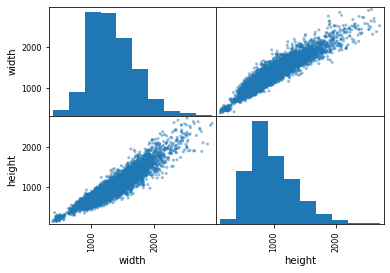

In [84]:
pneumonia_dataframe = pd.DataFrame({'width':width,'height':height})
plot = pd.plotting.scatter_matrix(pneumonia_dataframe)
print(plot)